 - https://stackoverflow.com/questions/68523795/fit-a-custom-function-in-python
 - https://www.wolframalpha.com/input/?i=diff%5B+%28A%2Fx%29*exp%28-%28%28log%28x%2Fmu%29%2Flog%28sigma%29%29%5E2%29%2F2%29%2C+x%5D

In [1]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
data = io.StringIO("""id;x;y;sy
0;1.0;0.121159;100
1;101.0;0.195525;1
2;201.0;0.167305;1
3;301.0;0.125499;1
4;401.0;0.094138;1
5;501.0;0.071610;1
6;601.0;0.053848;1
7;701.0;0.039890;1
8;801.0;0.031099;1
9;901.0;0.023976;1
10;1001.0;0.018271;1
11;1101.0;0.013807;1
12;1201.0;0.010596;1
13;1301.0;0.008033;1
14;1401.0;0.006710;1
15;1501.0;0.005222;1
16;1601.0;0.004299;1
17;1701.0;0.003376;1
18;1801.0;0.002976;1
19;1901.0;0.002659;1
""")
df = pd.read_csv(data, sep=";", index_col="id")

In [3]:
df 

,x,y,sy
id,,,
0,1.0,0.121159,100
1,101.0,0.195525,1
2,201.0,0.167305,1
3,301.0,0.125499,1
4,401.0,0.094138,1
5,501.0,0.071610,1
6,601.0,0.053848,1
7,701.0,0.039890,1
8,801.0,0.031099,1


In [4]:
df = df.loc[1:,:]

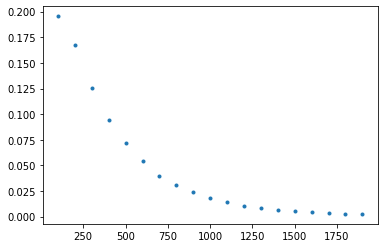

In [5]:
fig, axe = plt.subplots()
axe.plot(df.x, df.y, '.')

In [6]:
def func(x, A, mu, sigma):
    return (A/x)*np.exp(-((np.log(x/mu)/np.log(sigma))**2)/2)

In [7]:
popt, pcov = optimize.curve_fit(func, df.x, df.y, sigma=df.sy, p0=(50, 100, 0.1), method="lm")

In [8]:
popt

array([ 38.05564466, 315.9224773 ,   0.37133596])

In [9]:
pcov

array([[ 1.32237070e-01,  6.33522684e-02,  1.03426409e-03],
       [ 6.33522684e-02,  1.82633625e+01, -1.50874460e-02],
       [ 1.03426409e-03, -1.50874460e-02,  2.95381377e-05]])

In [10]:
xmax = popt[1]*np.exp(-np.log(popt[2])**2)

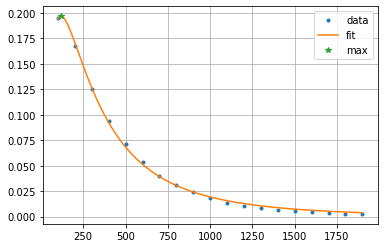

In [11]:
fig, axe = plt.subplots()
axe.plot(df.x, df.y, '.', label="data")
xl = np.linspace(df.x.min(), df.x.max(), 1000)
axe.plot(xl, func(xl, *popt), label="fit")
axe.plot([xmax], func([xmax], *popt), "*", label="max")
axe.legend()
axe.grid()

In [12]:
df["x2"] = df.x.apply(np.log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
X = np.log(df.x.values).reshape(-1, 1)
y = np.log(df.y)

In [14]:
linreg = LinearRegression()
poly = PolynomialFeatures(2)
model = make_pipeline(poly, linreg)

In [15]:
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [16]:
model.score(X, y)

0.9982242621455882

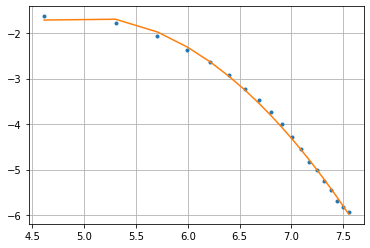

In [17]:
fig, axe = plt.subplots()
axe.plot(X, y, '.')
axe.plot(X, model.predict(X))
axe.grid()

In [18]:
model.steps[-1][1].coef_[0]

0.0